# Medical Insurance Prediction 

In [3]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# data loading
df=pd.read_csv('insurance.csv')

In [7]:
print("Information about dataset")
df.head()

Information about dataset


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
print("Missing Values per column")
df.isnull().sum()

Missing Values per column


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
print("Basic Statistical Description")
df.describe()

Basic Statistical Description


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


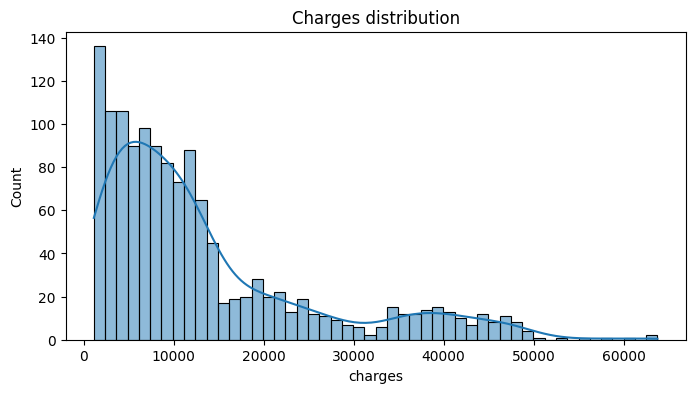

In [12]:
# charges distribution 
plt.figure(figsize=(8,4))
sns.histplot(df['charges'],bins=50,kde=True)
plt.title("Charges distribution")
plt.show()

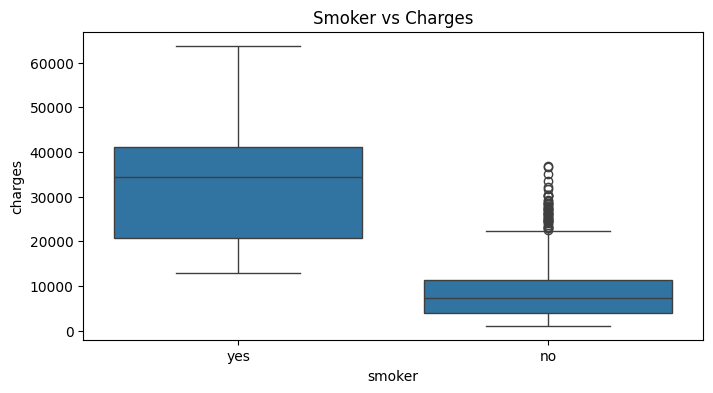

In [14]:
# smoker vs charges boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()

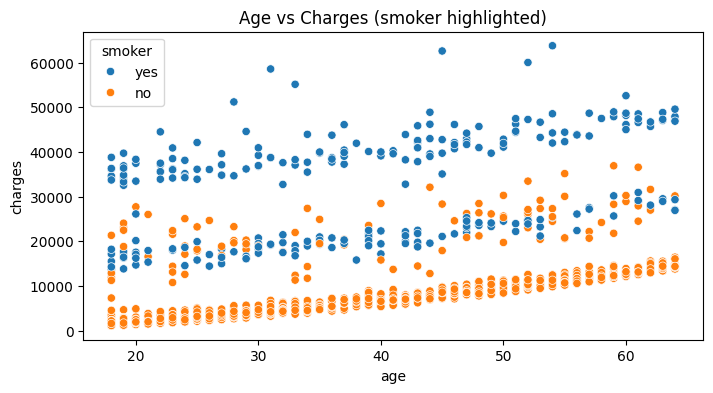

In [16]:
# Age vs Charges 
plt.figure(figsize=(8,4))
sns.scatterplot(x="age",y="charges",hue="smoker",data=df)
plt.title('Age vs Charges (smoker highlighted)')
plt.show()

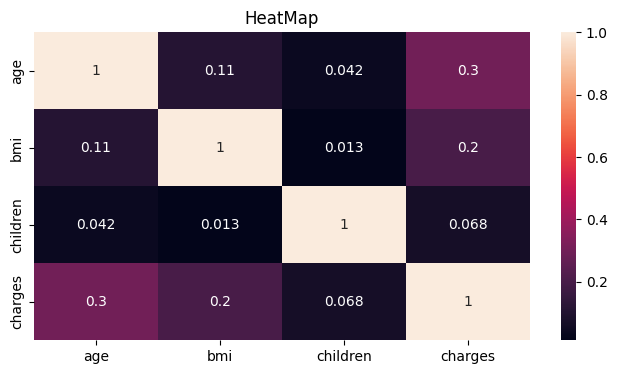

In [18]:
# Heatmap
num_cols = ['age','bmi','children','charges']
plt.figure(figsize=(8,4))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title('HeatMap')
plt.show()

# Data Cleaning

In [19]:
print("Before duplicates:", len(df))
df = df.drop_duplicates()
print("After duplicates:", len(df))

Before duplicates: 1338
After duplicates: 1337


In [20]:
print(df['region'].value_counts())
print(df['sex'].value_counts())
print(df['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64


# Model Building

# Splitting the Dataset
The following code uses the train_test_split function to divide the features (X) and target (y) data into training and testing sets. 70% of the data is used for training and 30% of the data is used for testing. Using random_state=42 ensures the data is split the exact same way every time.



In [22]:
X = df.drop('charges', axis=1)
y = df['charges']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [25]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Performance

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 4831.400050734648
R2 Score: 0.8635884812544394


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
importance = model.feature_importances_
features = X_train.columns
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
print(feat_importance)

            Feature  Importance
4        smoker_yes    0.605774
1               bmi    0.209188
0               age    0.140647
2          children    0.021728
3          sex_male    0.006876
6  region_southeast    0.006482
5  region_northwest    0.005552
7  region_southwest    0.003753


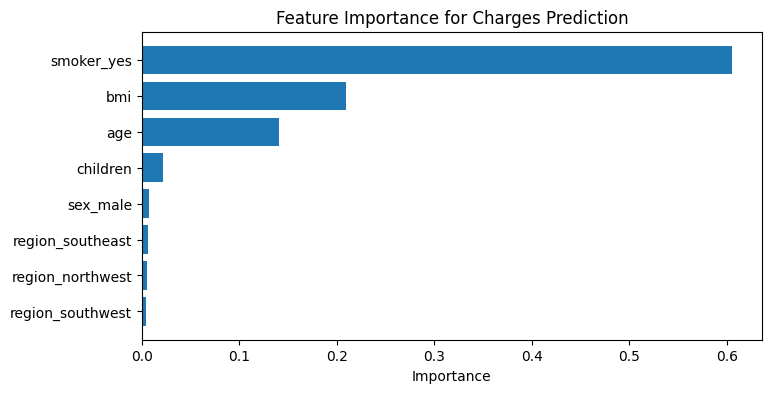

In [32]:
plt.figure(figsize=(8,4))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis() 
plt.xlabel('Importance')
plt.title('Feature Importance for Charges Prediction')
plt.show()

# Pickling Model

In [33]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']